# Análise da disparidade entre óbitos e curas dos idosos no Estado do Rio de Janeiro

Integrantes:
- Matheus Henrique Gonçalves Ferreira
- Rafael Rodrigo Correia de Lima

## Fonte dos dados: https://opendatasus.saude.gov.br/dataset/bd-srag-2020

In [7]:
import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = r'C:\Users\rafae\Desktop\Fatec\2020-01SEM\Proj_de_BD_nao_estruturados\INFLUD-30-06-2020.csv'
df = pd.read_csv(filename, delimiter = ';', encoding='ISO-8859-1', error_bad_lines=False)

c:\users\rafae\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (18,59,61,62,63,103,105,117,119,126,128,129,130,132) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.loc[(df.EVOLUCAO.isnull()), 'EVOLUCAO'] = 9
troca_evolucao = { 1: 'Cura', 2: 'Óbito', 9: 'Ignorado'}
df['EVOLUCAO'] = df['EVOLUCAO'].apply(lambda x: troca_evolucao[x])

troca_valores = { 1: 'Viajou', 2: 'Não viajou', 0: 'Ignorado', 9: 'Ignorado'}
df['HISTO_VGM'] = df['HISTO_VGM'].apply(lambda x: troca_valores[x])

df.loc[(df.CS_SEXO.isnull()), 'CS_SEXO'] = 9
troca_sexo = { "M": 'Masculino', "F": 'Feminino', "I": 'Ignorado'}
df['CS_SEXO'] = df['CS_SEXO'].apply(lambda x: troca_sexo[x])

df.loc[(df.CS_RACA.isnull()), 'CS_RACA'] = 9
troca_etinia = { 1: "Branca", 2: "Preta", 3: "Amarela", 4: "Parda", 5:"Indígena" ,9: "Ignorado" }
df['CS_RACA'] = df['CS_RACA'].apply(lambda x: troca_etinia[x])

df.loc[(df.CLASSI_FIN.isnull()), 'CLASSI_FIN'] = 9
troca_classific = { 1: "SRAG por influenza", 
2: "SRAG por outro vírus respiratório", 3: "SRAG por outro agente Etiológico, qual:", 
4: "SRAG não especificado", 5: "COVID-19", 9: "Não informado" }

df['CLASSI_FIN'] = df['CLASSI_FIN'].apply(lambda x: troca_classific[x])

# Motivação
- Ao analisar os dados gerais dos idosos em relação aos óbitos dos estados com maior número de registros, como esperado, São Paulo tem o maior índice, seguido do Rio de Janeiro, mas quando analisadas as curas, São Paulo continua com uma quantidade equilibrada entre suas quantidades, mas o Rio de Janeiro tem um valor praticamente 50% menor comparado com os óbitos.

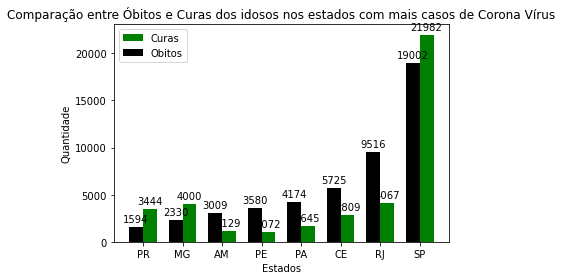

In [9]:
#Versão com todos os dados (para cruzamento depois)
obitos = df.query('EVOLUCAO == "Óbito" and NU_IDADE_N > 59').groupby('SG_UF').size().sort_values()
curas = df.query('EVOLUCAO == "Cura" and NU_IDADE_N > 59').groupby('SG_UF').size().sort_values()
#Versão apenas dos 10 mais numerosos
obitos_l = obitos.tail(10)
curas_l = curas.tail(10)

 

#Transforma em dictonary para manipulação
dados_obitos = dict(obitos_l)
dados_curas = dict(curas_l)
dados = {}

 

#Pega os estados de curas e obitos, junta as duas arrays (alguns estados não estão no outro)
estados = list(dados_obitos.keys()) + list(dados_curas.keys())
#Tira os items repetidos
estados = list(dict.fromkeys(estados))

 

#Para cada estado, pega nos dados completos o valor, e organiza dentro dos dados do gráfico
dados_grafico = {'estados': [], 'obitos': [], 'curas': []}
for estado in estados:
    if(estado in dados_obitos.keys() and estado in dados_curas.keys()):
        dados_grafico['estados'].append(estado)
        dados_grafico['obitos'].append(dados_obitos[estado])
        dados_grafico['curas'].append(dados_curas[estado])

 

#Pega cada um dos itens
labels = dados_grafico['estados']
obitos = dados_grafico['obitos']
curas = dados_grafico['curas']

 

#Cria os conjuntos de barras (óbitos e curas) e seta tamanho da barra
x = np.arange(len(labels)) 
width = 0.35

 

#Cria o plot e as duas barras (óbitos e curas)
fig, ax = plt.subplots()
rects1 = ax.bar(x + width/2, curas, width, label='Curas', color='green')
rects2 = ax.bar(x - width/2, obitos, width, label='Obitos', color = 'black')

 

#Seta legendas e títulos do gráfico
ax.set(ylabel='Quantidade', xlabel='Estados')
ax.set_title('Comparação entre Óbitos e Curas dos idosos nos estados com mais casos de Corona Vírus')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

 

#Função para que todos os conjuntos tenham label do estado
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects1)
autolabel(rects2)

 

plt.show()

- Podemos comprovar essa diferença a partir do gráfico abaixo, que apresenta as quantidades de casos no Rio de Janeiro separados por evolução, ou seja, o que houve ao fim de cada caso.

[Text(0, 0.5, 'QUANTIDADE DE CURAS')]

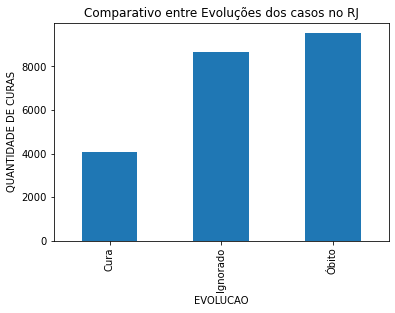

In [62]:
df.query('SG_UF == "RJ" and NU_IDADE_N > 59').groupby('EVOLUCAO').size().plot(kind='bar', title='Comparativo entre Evoluções dos casos no RJ').set(ylabel='QUANTIDADE DE CURAS')

- Apesar disso o Rio de Janeiro ainda teve menos casos de São Paulo e obteve um pico mais cedo.

[Text(0.5, 0, 'SEMANAS')]

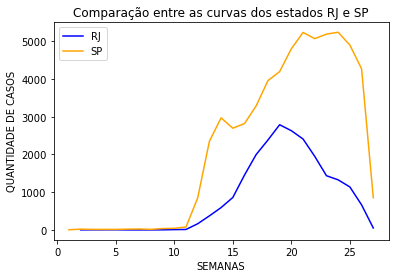

In [63]:
df.query('SG_UF == "RJ" and NU_IDADE_N > 59').groupby('SEM_NOT').size().plot(legend=True, label='RJ', color="BLUE").set(xlabel = 'SEMANAS', ylabel='QUANTIDADE DE CASOS', title='Comparação entre as curvas dos estados RJ e SP')
df.query('SG_UF == "SP" and NU_IDADE_N > 59').groupby('SEM_NOT').size().plot(legend=True, label='SP', color="ORANGE").set(xlabel = 'SEMANAS')

- É possível perceber também que existe uma concentração grande dentro da capital do Rio de Janeiro. Isso acontece, é claro, porque é o local com maior número de habitantes.

[Text(0, 0.5, 'CIDADES'),
 Text(0.5, 0, 'QUANTIDADE DE CASOS'),
 Text(0.5, 1.0, 'Cidades do RJ com maiores números de casos')]

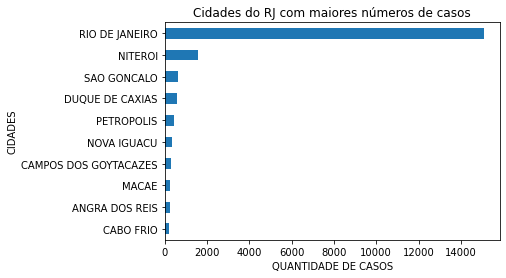

In [64]:
df.query('SG_UF == "RJ" and NU_IDADE_N > 59').groupby('ID_MUNICIP').size().sort_values().tail(10).plot(kind='barh').set(xlabel = 'QUANTIDADE DE CASOS', ylabel='CIDADES', title='Cidades do RJ com maiores números de casos')

- O gráfico abaixo compara os casos entre cidade e estado do Rio de Janeiro.

[Text(0, 0.5, 'QUANTIDADE DE CASOS'), Text(0.5, 0, 'SEMANAS')]

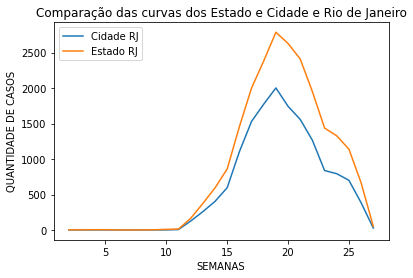

In [65]:
df.query('ID_MUNICIP == "RIO DE JANEIRO" and NU_IDADE_N > 59').groupby('SEM_NOT').size().plot(legend=True, label='Cidade RJ').set(xlabel = 'SEMANAS', title='Comparação das curvas dos Estado e Cidade e Rio de Janeiro')
df.query('SG_UF == "RJ" and NU_IDADE_N > 59').groupby('SEM_NOT').size().plot(legend=True, label='Estado RJ').set(xlabel = 'SEMANAS', ylabel='QUANTIDADE DE CASOS')

- Tanto óbitos quanto curas estavam emparelhados se analisados até por volta da semana 10, imediatamente depois com o aumento dos números de casos começou a acontecer uma diferença considerável entre as evoluções, a qual chegou ao ápice por volta da semana 20.

[Text(0, 0.5, 'QUANTIDADE DE CASOS'), Text(0.5, 0, 'SEMANAS')]

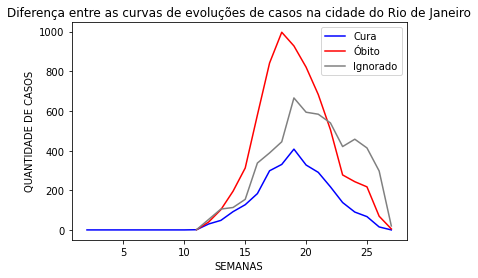

In [68]:
df.query('ID_MUNICIP == "RIO DE JANEIRO" and NU_IDADE_N > 59 and EVOLUCAO == "Cura"').groupby('SEM_NOT').size().plot(legend=True, label='Cura', color='BLUE').set(xlabel = 'SEMANAS', ylabel='QUANTIDADE DE CASOS', title='Diferença entre as curvas de evoluções de casos na cidade do Rio de Janeiro')
df.query('ID_MUNICIP == "RIO DE JANEIRO" and NU_IDADE_N > 59 and EVOLUCAO == "Óbito"').groupby('SEM_NOT').size().plot(legend=True, label='Óbito', color='RED').set(xlabel = 'SEMANAS', ylabel='QUANTIDADE DE CASOS')
df.query('ID_MUNICIP == "RIO DE JANEIRO" and NU_IDADE_N > 59 and EVOLUCAO == "Ignorado"').groupby('SEM_NOT').size().plot(legend=True, label='Ignorado', color='GRAY').set(xlabel = 'SEMANAS', ylabel='QUANTIDADE DE CASOS')

- Analisando de forma separada os casos de cura e óbitos levando em conta casos com registro de evolução ignorados ou não temos os resultados em porcentagem.

In [54]:
curasRJ = str(df.query('ID_MUNICIP == "RIO DE JANEIRO" and NU_IDADE_N > 59 and EVOLUCAO == "Cura"').groupby('ID_MUNICIP').size()).split(' ')
curasRJ = int((curasRJ[6].split('\n'))[0])

obitosRJ = str(df.query('ID_MUNICIP == "RIO DE JANEIRO" and NU_IDADE_N > 59 and EVOLUCAO == "Óbito"').groupby('ID_MUNICIP').size()).split(' ')
obitosRJ = int((obitosRJ[6].split('\n'))[0])

totalCasos = str(df.query('ID_MUNICIP == "RIO DE JANEIRO" and NU_IDADE_N > 59').groupby('ID_MUNICIP').size()).split(' ')
totalCasos = int((totalCasos[6].split('\n'))[0])

totalSemIgnorados = str(df.query('ID_MUNICIP == "RIO DE JANEIRO" and NU_IDADE_N > 59 and EVOLUCAO != "Ignorado"').groupby('ID_MUNICIP').size()).split(' ')
totalSemIgnorados = int((totalSemIgnorados[6].split('\n'))[0])

print('Considerando os casos com evolução com o valor "Ignorado"\n')

porcentagemCurasRJ = (curasRJ * 100) / totalCasos
print('%.2f%% de curas registradas' %(porcentagemCurasRJ))

porcentagemObitosRJ = (obitosRJ * 100) / totalCasos
print('%.2f%% de óbitos registrados' %(porcentagemObitosRJ))

ignorado = ((totalCasos - (curasRJ + obitosRJ)) * 100) / totalCasos
print('%.2f%% registrados como "Ignorado"' %(ignorado))

print('\nDesconsiderando os casos com evolução com o valor "Ignorado"\n')

porcentCurasSemIgnoradosRJ = (curasRJ * 100) / totalSemIgnorados
print('%.2f%% de curas registradas' %(porcentCurasSemIgnoradosRJ))

porcentCurasSemIgnoradosRJ = (obitosRJ * 100) / totalSemIgnorados
print('%.2f%% de óbitos registrados' %(porcentCurasSemIgnoradosRJ))

Considerando os casos com evolução com o valor "Ignorado"

17.74% de curas registradas
45.20% de óbitos registrados
37.06% registrados como "Ignorado"

Desconsiderando os casos com evolução com o valor "Ignorado"

28.19% de curas registradas
71.81% de óbitos registrados


- Como muitos casos tem registros absurdos com idades de pacientes com mais de 130 anos, foi feita a análise também para verificar se a disparidade entre óbitos e curas dos idosos no Rio de Janeiro era apenas uma falha de digitação ou algo parecido, porém, não é o que parece olhando para o gráfico que segue.

[Text(0, 0.5, 'QUANTIDADE DE CASOS'), Text(0.5, 0, 'IDADES')]

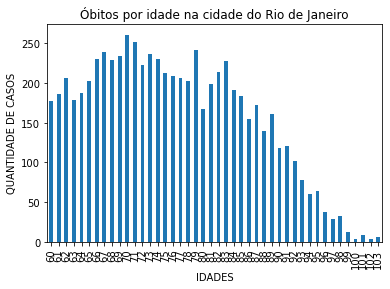

In [70]:
df.query('ID_MUNICIP == "RIO DE JANEIRO" and NU_IDADE_N > 59 and EVOLUCAO == "Óbito"').groupby('NU_IDADE_N').size().plot(kind='bar', title='Óbitos por idade na cidade do Rio de Janeiro').set(xlabel = 'IDADES', ylabel='QUANTIDADE DE CASOS')

- Também pode-se conferir que a maior parte das classificações de óbitos é de COVID19, em conjunto com casos não espeficicados de doenças respiratórias.

[Text(0, 0.5, 'CLASSIFICAÇÃO FINAL DOS CASOS'),
 Text(0.5, 0, 'QUANTIDADE DE ÓBITOS')]

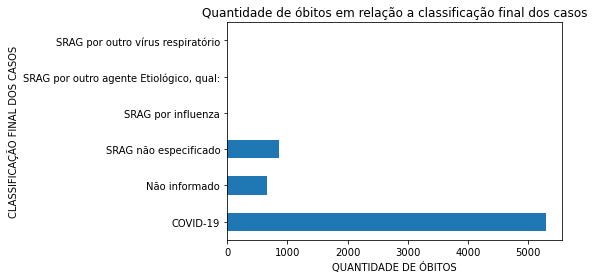

In [73]:
df.query('ID_MUNICIP == "RIO DE JANEIRO" and NU_IDADE_N > 59 and EVOLUCAO == "Óbito"').groupby('CLASSI_FIN').size().plot(kind='barh', title='Quantidade de óbitos em relação a classificação final dos casos').set(xlabel = 'QUANTIDADE DE ÓBITOS', ylabel='CLASSIFICAÇÃO FINAL DOS CASOS')

- As curas também possuem o mesmo padrão em proporção, mas com a quantidade ainda praticamente na metade em comparação com os óbitos.

[Text(0, 0.5, 'Classificação do caso'), Text(0.5, 0, 'Quantidade de curas')]

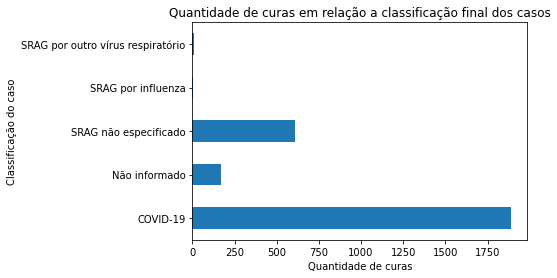

In [75]:
df.query('ID_MUNICIP == "RIO DE JANEIRO" and NU_IDADE_N > 59 and EVOLUCAO == "Cura"').groupby('CLASSI_FIN').size().plot(kind='barh', title='Quantidade de curas em relação a classificação final dos casos').set(xlabel = 'Quantidade de curas', ylabel='Classificação do caso')